## Nota importante
La teoría de árboles de decisión queda vista en el apartado de clasificación.

Esto es una continuación, donde estudiaremos la regresión en los árboles de decisión.

Dejo como puntos a repasar generales:
- Ventajas y Desventas
- Consejos prácticos

## Preparación del entorno

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Regresión en árboles de decisión
Podemos aplicar árboles de decisión a problemas de regresión utilizando la clase```DecisionTreeRegresor```.

Al igual que en la configuración de clasificación, el método de ajuste tomará como argumentos las matrices X e y, solo que en este caso se espera que y tenga valores float en lugar de int:

In [8]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

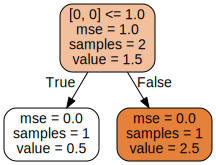

In [9]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        clf,
        out_file=os.path.join(IMAGES_PATH, "clf_tree.dot"),
        feature_names=X,
        class_names=y,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "clf_tree.dot"))

## Ventajas VS Desventajas

Algunas ventajas de los árboles de decisión son:

- Sencillo de entender e interpretar. Los árboles se pueden visualizar.

- Requiere poca preparación de datos. Otras técnicas a menudo requieren la normalización de datos, es necesario crear variables ficticias y eliminar valores en blanco. Sin embargo, tenga en cuenta que este módulo no admite valores perdidos.

- El costo de usar el árbol (es decir, predecir datos) es logarítmico en el número de puntos de datos usados para entrenar el árbol.

- Capaz de manejar datos tanto numéricos como categóricos. Otras técnicas suelen estar especializadas en analizar conjuntos de datos que tienen un solo tipo de variable.

- Capaz de manejar problemas de múltiples salidas.

- Utiliza un modelo de caja blanca. Si una situación dada es observable en un modelo, la explicación de la condición se explica fácilmente mediante lógica booleana. Por el contrario, en un modelo de caja negra (por ejemplo, en una red neuronal artificial), los resultados pueden ser más difíciles de interpretar.

- Posible validar un modelo mediante pruebas estadísticas. Eso permite tener en cuenta la fiabilidad del modelo.

- Se desempeña bien incluso si el modelo real a partir del cual se generaron los datos viola sus suposiciones.

Las desventajas de los árboles de decisión incluyen:

- Los aprendices de árboles de decisiones pueden crear árboles demasiado complejos que no generalizan bien los datos. Esto se llama sobreajuste. Para evitar este problema son necesarios mecanismos como la poda, el establecimiento del número mínimo de muestras necesarias en un nodo de la hoja o el establecimiento de la profundidad máxima del árbol.

- Los árboles de decisión pueden ser inestables porque pequeñas variaciones en los datos pueden resultar en la generación de un árbol completamente diferente. Este problema se mitiga mediante el uso de árboles de decisión dentro de un conjunto.

- Se sabe que el problema de aprender un árbol de decisión óptimo es NP-completo en varios aspectos de la optimalidad e incluso para conceptos simples. En consecuencia, los algoritmos prácticos de aprendizaje del árbol de decisiones se basan en algoritmos heurísticos, como el algoritmo codicioso, donde se toman decisiones localmente óptimas en cada nodo. Dichos algoritmos no pueden garantizar la devolución del árbol de decisiones globalmente óptimo. Esto se puede mitigar entrenando varios árboles en un aprendiz de conjunto, donde las características y muestras se muestrean al azar con reemplazo.

- Hay conceptos que son difíciles de aprender porque los árboles de decisión no los expresan fácilmente, como XOR, problemas de paridad o multiplexor.

- Los aprendices del árbol de decisiones crean árboles sesgados si dominan algunas clases. Por lo tanto, se recomienda equilibrar el conjunto de datos antes de ajustarlo al árbol de decisiones.

## Consejos de uso práctico
- Los árboles de decisión tienden a sobreajustarse a los datos con una gran cantidad de características. Es importante obtener la proporción correcta de muestras con respecto al número de características, ya que es muy probable que un árbol con pocas muestras en un espacio de gran dimensión se sobreajuste.

- Considere realizar la reducción de dimensionalidad ( PCA , ICA o selección de características ) de antemano para darle a su árbol una mejor oportunidad de encontrar características que sean discriminatorias.

- Comprender la estructura del árbol de decisiones ayudará a obtener más información sobre cómo el árbol de decisiones hace predicciones, lo cual es importante para comprender las características importantes de los datos.

- Visualice su árbol mientras entrena utilizando la export función. Use max_depth=3 como una profundidad de árbol inicial para tener una idea de cómo el árbol se ajusta a sus datos y luego aumente la profundidad.

- Recuerde que la cantidad de muestras necesarias para poblar el árbol se duplica por cada nivel adicional al que crece el árbol. Use max_depth para controlar el tamaño del árbol para evitar el sobreajuste.

- Utilice min_samples_splito min_samples_leaf para asegurarse de que varias muestras informan cada decisión en el árbol, controlando qué divisiones se considerarán. Un número muy pequeño generalmente significará que el árbol se ajustará en exceso, mientras que un número grande evitará que el árbol aprenda los datos. Pruébelo min_samples_leaf=5 como valor inicial. Si el tamaño de la muestra varía mucho, se puede utilizar un número flotante como porcentaje en estos dos parámetros. Si bien min_samples_split puede crear hojas arbitrariamente pequeñas, min_samples_leaf garantiza que cada hoja tenga un tamaño mínimo, evitando nodos de hojas de baja varianza y sobreajuste en problemas de regresión. Para la clasificación con pocas clases, min_samples_leaf=1 suele ser la mejor opción.

- Equilibre su conjunto de datos antes del entrenamiento para evitar que el árbol esté sesgado hacia las clases dominantes. El balance de clases se puede hacer muestreando un número igual de muestras de cada clase, o preferiblemente normalizando la suma de los pesos de las muestras ( sample_weight) para cada clase al mismo valor. También tenga en cuenta que los criterios de prepoda basados en el peso, como min_weight_fraction_leaf, estarán menos sesgados hacia las clases dominantes que los criterios que no son conscientes de los pesos de la muestra, como min_samples_leaf.

- Si se pesan las muestras, será más fácil optimizar la estructura del árbol utilizando un criterio de poda previa basado en el peso, como min_weight_fraction_leaf, que asegura que los nudos de las hojas contienen al menos una fracción de la suma total de los pesos de las muestras.

- Todos los árboles de decisión utilizan np.float32 matrices internamente. Si los datos de entrenamiento no están en este formato, se realizará una copia del conjunto de datos.

- Si la matriz de entrada X es muy escasa, se recomienda convertirla a escasa csc_matrix antes de llamar a ajuste y escasa csr_matrix antes de llamar a predecir. El tiempo de entrenamiento puede ser varios órdenes de magnitud más rápido para una entrada de matriz escasa en comparación con una matriz densa cuando las entidades tienen valores cero en la mayoría de las muestras.